In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("depression_anxiety_data.csv")
data


,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [4]:
#Percentage by Column
null_values = data.isnull().sum()
# Get the percentage of null values for each column
percent_null_by_column = (null_values / len(data) * 100).round(2)

print("\nPercentage of null values by column:")
print(percent_null_by_column)


Percentage of null values by column:
id                      0.00
school_year             0.00
age                     0.00
gender                  0.00
bmi                     0.00
who_bmi                 0.00
phq_score               0.00
depression_severity     0.51
depressiveness          0.38
suicidal                0.13
depression_diagnosis    0.13
depression_treatment    0.51
gad_score               0.00
anxiety_severity        0.00
anxiousness             0.77
anxiety_diagnosis       0.51
anxiety_treatment       0.26
epworth_score           1.02
sleepiness              1.02
dtype: float64


In [5]:
# Handle missing values if any (here assuming no missing values)
data.dropna(inplace=True)

In [6]:
# Set plot style
sns.set(style="whitegrid")


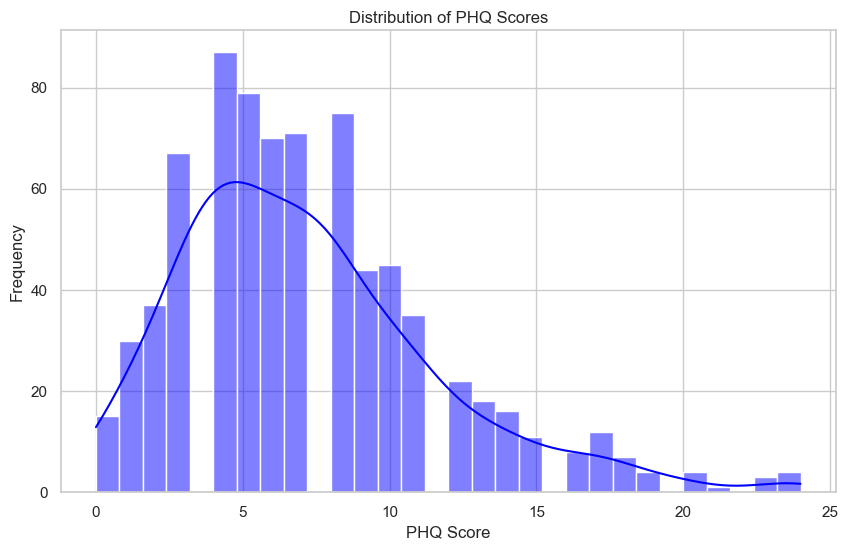

In [7]:
# Plot distribution of PHQ scores
plt.figure(figsize=(10, 6))
sns.histplot(data['phq_score'], kde=True, bins=30, color='blue')
plt.title('Distribution of PHQ Scores')
plt.xlabel('PHQ Score')
plt.ylabel('Frequency')
plt.show()

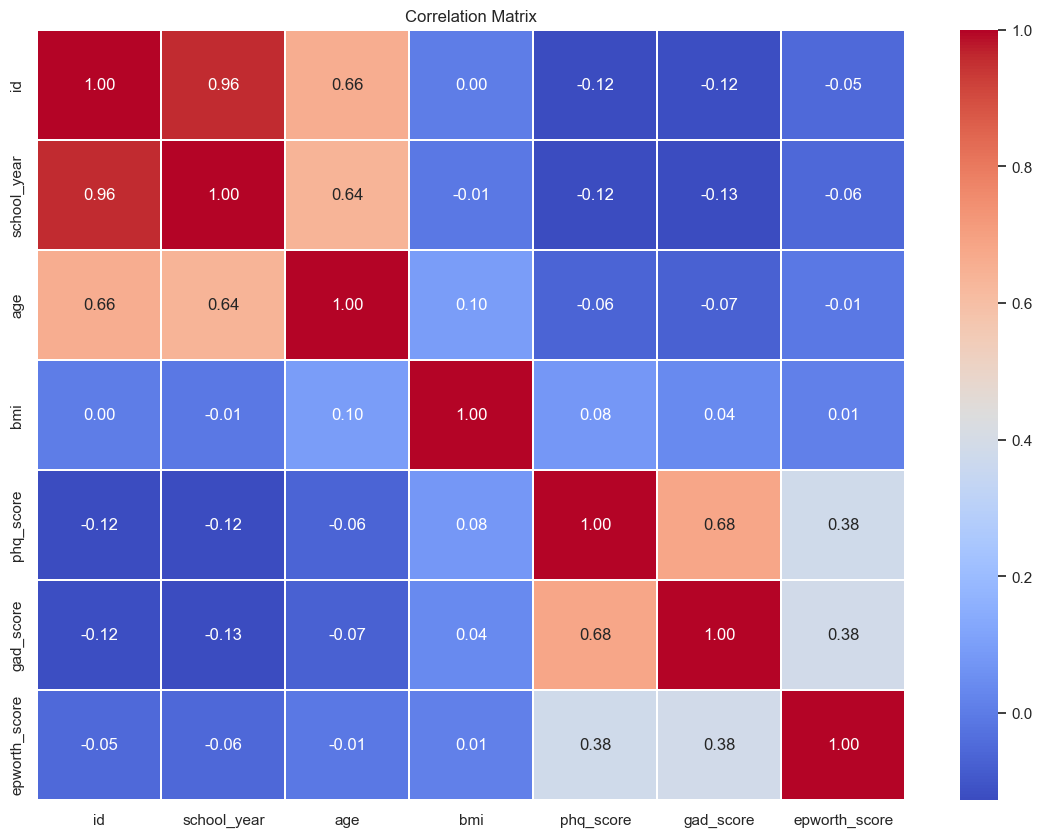

In [8]:

# Plot correlation matrix
plt.figure(figsize=(14, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

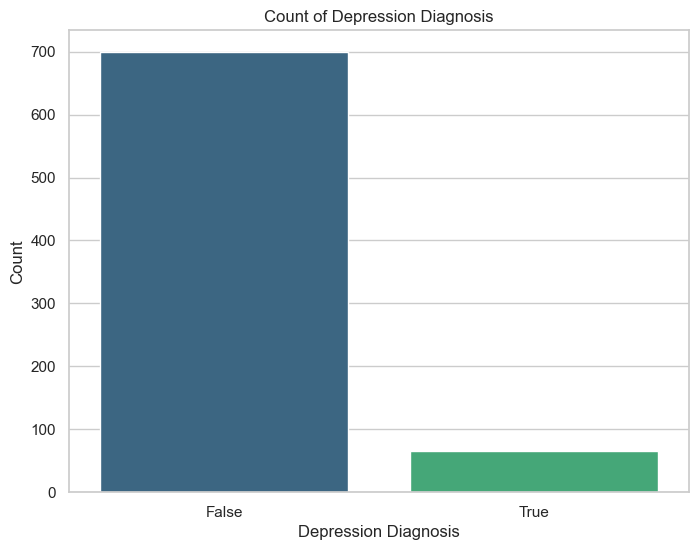

In [9]:

# Plot count of depression diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='depression_diagnosis', data=data, palette='viridis')
plt.title('Count of Depression Diagnosis')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Count')
plt.show()

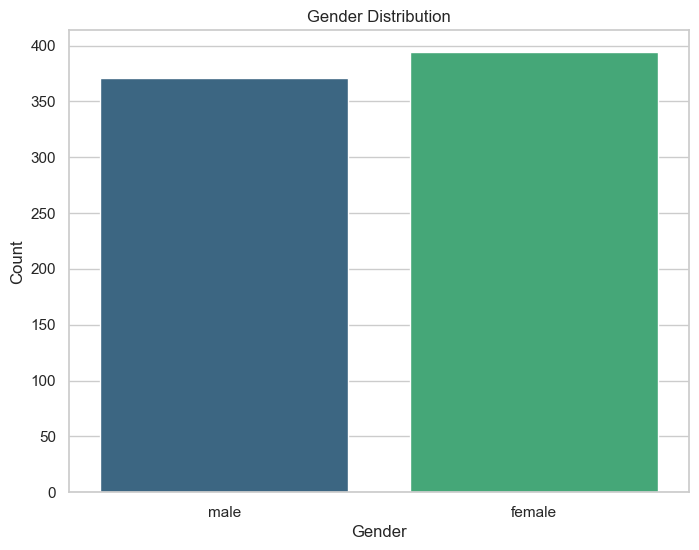

In [10]:
# Plot gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

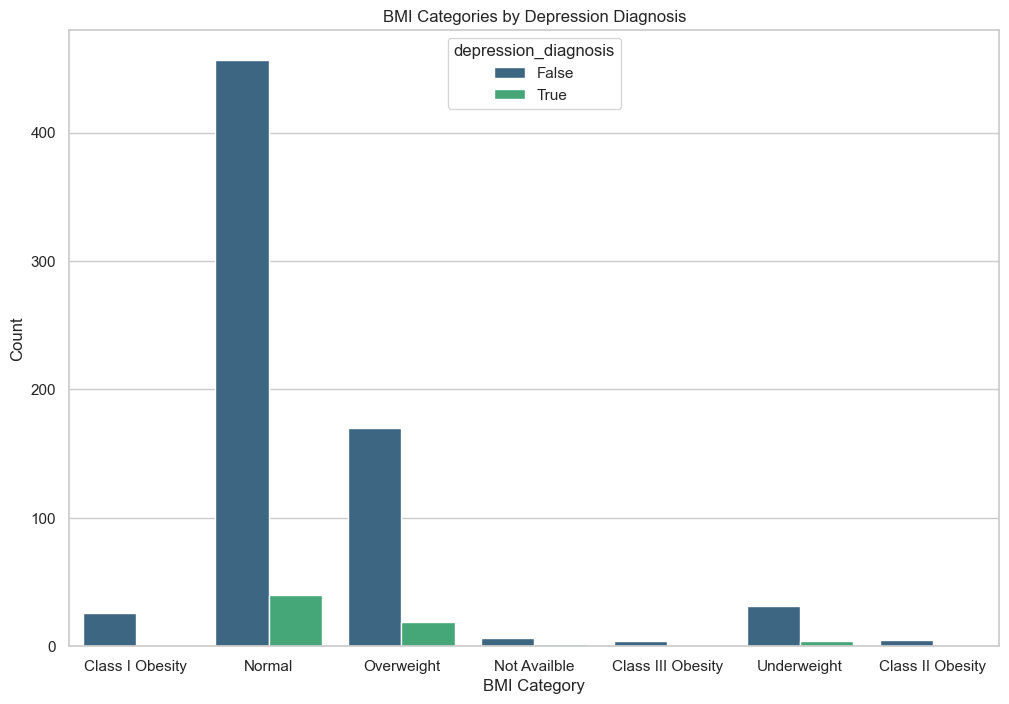

In [11]:
# Plot BMI categories by depression diagnosis
plt.figure(figsize=(12, 8))
sns.countplot(x='who_bmi', hue='depression_diagnosis', data=data, palette='viridis')
plt.title('BMI Categories by Depression Diagnosis')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.savefig('bmi_categories_by_depression_diagnosis.png', dpi=300, bbox_inches='tight')
plt.show()


In [12]:

# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [13]:
# Define features and target
X = data.drop('depression_diagnosis', axis=1)
y = data['depression_diagnosis']


In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:

# Evaluate model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9215686274509803
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       141
           1       0.50      0.33      0.40        12

    accuracy                           0.92       153
   macro avg       0.72      0.65      0.68       153
weighted avg       0.91      0.92      0.91       153



In [17]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

In [18]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

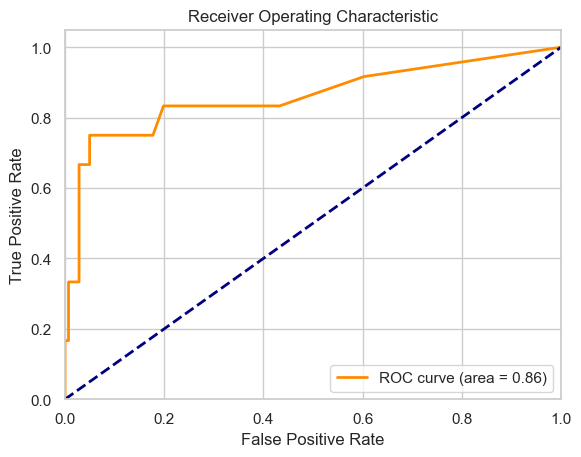

In [19]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
# Define column names
column_names = X.columns.tolist()



# Preprocess input function
def preprocess_input(user_input, label_encoders, column_names):
    input_df = pd.DataFrame([user_input], columns=column_names)
    
    # Encode categorical variables
    for column in input_df.columns:
        if input_df[column].dtype == 'object':
            if column in label_encoders:
                encoder = label_encoders[column]
                # Handle unseen labels
                unseen_labels = [label for label in input_df[column].unique() if label not in encoder.classes_]
                if unseen_labels:
                    raise ValueError(f"Unknown labels in column '{column}': {unseen_labels}")
                input_df[column] = encoder.transform(input_df[column])
            else:
                raise ValueError(f"Column '{column}' not found in training data.")
    
    return input_df

# Prediction function
def predict_depression(user_input, model, label_encoders, column_names):
    try:
        # Preprocess the user input
        preprocessed_input = preprocess_input(user_input, label_encoders, column_names)
        
        # Make prediction
        prediction = model.predict(preprocessed_input)
        
        # Output result
        return "You have depression." if prediction[0] == 1 else "You do not have depression."
    except ValueError as e:
        return f"Error processing input: {e}"

# Example user input
user_input = {
    'id': 102,  # Unique identifier
    'school_year': 11,  # Example school year
    'age': 30,  # Example age
    'gender': 'female',  # Gender
    'bmi': 22.0,  # Example BMI
    'who_bmi': 'Normal',  # WHO BMI category
    'phq_score': 18,  # Higher PHQ score indicating more severe depression
    'depression_severity': 'Severe',  # More severe depression level
    'depressiveness': True,  # True or False
    'suicidal': True,  # True or False
    'depression_treatment': True,  # True or False
    'gad_score': 10,  # Higher GAD score
    'anxiety_severity': 'Moderate',  # Anxiety severity
    'anxiousness': True,  # True or False
    'anxiety_diagnosis': True,  # True or False
    'anxiety_treatment': True,  # True or False
    'epworth_score': 8,  # Higher Epworth score
    'sleepiness': True,  # True or False
}

# Make prediction
result = predict_depression(user_input, model, label_encoders, column_names)
print(result)

You have depression.
